<a href="https://colab.research.google.com/github/IlyaMolchanovv/MachineLearning/blob/main/Indiv_Regression_var7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd


file_path = '/content/BeijingPM20100101_20151231.csv'
df = pd.read_csv(file_path)

In [5]:
df.shape


(52584, 18)

In [6]:
df.dtypes

No                   int64
year                 int64
month                int64
day                  int64
hour                 int64
season               int64
PM_Dongsi          float64
PM_Dongsihuan      float64
PM_Nongzhanguan    float64
PM_US Post         float64
DEWP               float64
HUMI               float64
PRES               float64
TEMP               float64
cbwd                object
Iws                float64
precipitation      float64
Iprec              float64
dtype: object

In [7]:
df.isnull().sum()

No                     0
year                   0
month                  0
day                    0
hour                   0
season                 0
PM_Dongsi          27532
PM_Dongsihuan      32076
PM_Nongzhanguan    27653
PM_US Post          2197
DEWP                   5
HUMI                 339
PRES                 339
TEMP                   5
cbwd                   5
Iws                    5
precipitation        484
Iprec                484
dtype: int64

In [8]:
df = df.fillna(df.mean())

<ipython-input-8-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [9]:
df.describe()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,89.154439,92.560806,88.643737,95.904241,2.074554,54.602421,1016.465442,12.587040,23.261829,19.258683,19.519008
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,60.214608,54.972619,60.621160,89.708835,14.221382,25.907420,10.261831,12.097952,49.279362,4360.826309,4360.826814
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,1.000000,-40.000000,2.000000,991.000000,-19.000000,0.450000,0.000000,0.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,69.000000,92.560806,68.000000,29.000000,-10.000000,32.000000,1008.000000,2.000000,1.790000,0.000000,0.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,89.154439,92.560806,88.643737,73.000000,2.000000,55.000000,1016.000000,14.000000,4.920000,0.000000,0.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,89.154439,92.560806,88.643737,128.000000,15.000000,78.000000,1025.000000,23.000000,21.450000,0.000000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,737.000000,672.000000,844.000000,994.000000,28.000000,100.000000,1046.000000,42.000000,585.600000,999990.000000,999990.000000


In [10]:
correlation_matrix = df.corr()
print(correlation_matrix)

                       No          year         month           day  \
No               1.000000  9.860132e-01  1.662567e-01  1.550485e-02   
year             0.986013  1.000000e+00  1.753370e-04 -2.016196e-04   
month            0.166257  1.753370e-04  1.000000e+00  1.097865e-02   
day              0.015505 -2.016196e-04  1.097865e-02  1.000000e+00   
hour             0.000456 -1.718445e-15  5.698666e-17 -5.714985e-18   
season           0.034825 -1.805473e-04  2.066777e-01 -1.271663e-02   
PM_Dongsi       -0.014254 -8.561734e-03 -3.985562e-02  5.040179e-02   
PM_Dongsihuan   -0.006043 -3.456007e-03 -1.919483e-02  3.523617e-02   
PM_Nongzhanguan -0.008392 -6.008485e-03 -1.977300e-02  5.068944e-02   
PM_US Post      -0.050943 -5.152134e-02 -7.827156e-03  7.442379e-02   
DEWP             0.068508  2.727923e-02  2.502152e-01  3.701574e-02   
HUMI             0.018724 -1.815170e-02  2.176720e-01  4.399244e-02   
PRES            -0.014536 -6.141988e-03 -5.400345e-02 -1.169671e-03   
TEMP  

<ipython-input-10-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


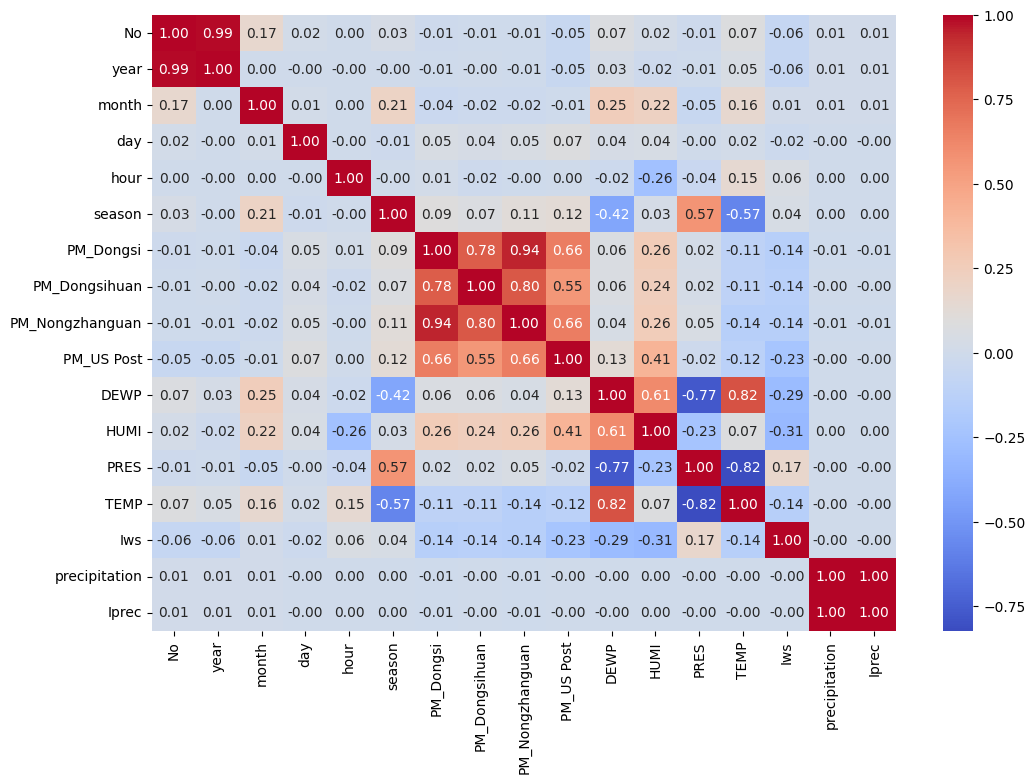

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [12]:

df['mean_PM'] = df[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].mean(axis=1)
df = df.drop(['precipitation', 'year', 'DEWP','PM_Dongsi', 'PM_US Post'], axis=1)

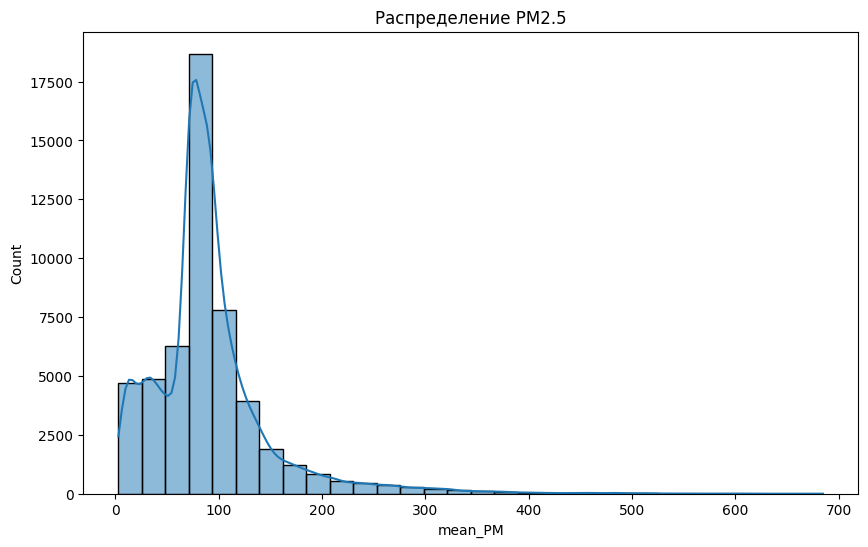

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mean_PM'], bins=30, kde=True)
plt.title('Распределение PM2.5')
plt.show()

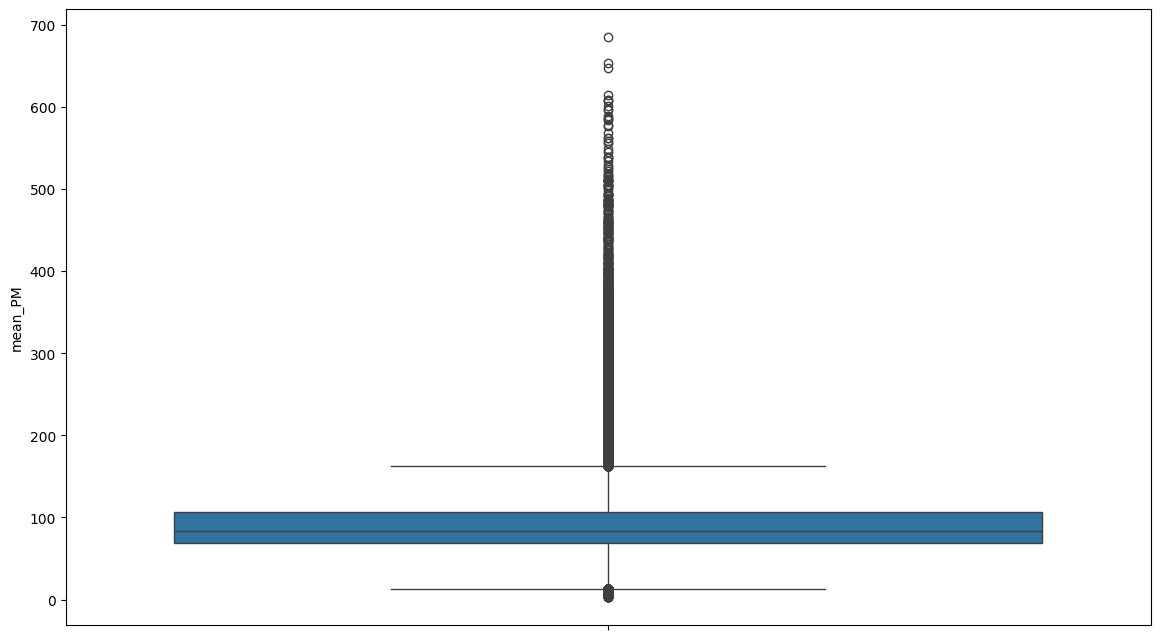

In [14]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df['mean_PM'])
plt.show()

In [15]:
df = pd.get_dummies(df, columns=['cbwd'])

In [16]:
from sklearn.model_selection import train_test_split


X = df.drop('mean_PM', axis=1)
y = df['mean_PM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [19]:
y_pred = model.predict(X_test_scaled)

# Пример использования метрик
from sklearn.metrics import r2_score, mean_squared_error

print(f'R^2: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')


R^2: 0.9240685361441741
MSE: 256.5717730641158


In [20]:
# Вывод коэффициентов модели
print('Коэффициенты:', model.coef_)


Коэффициенты: [-1.09053122e+00 -1.00281409e+00  8.53452419e-01  1.82354083e+00
  1.41527233e+00  1.58825655e+01  3.98813722e+01  5.57665039e+00
 -3.31855094e+00 -4.18261841e+00 -1.24072122e+00 -3.42048578e-02
  1.06350166e+00  6.46846031e-01  3.93823724e+00  3.31953427e+00]


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'RandomForest-MSE: {mse_rf}')
print(f'RandomForest-R2: {r2_rf}')

RandomForest-MSE: 78.28030185192512
RandomForest-R2: 0.9768332352397657


In [23]:
new_data_scaled = scaler.transform(X_train)
prediction = model.predict(new_data_scaled)


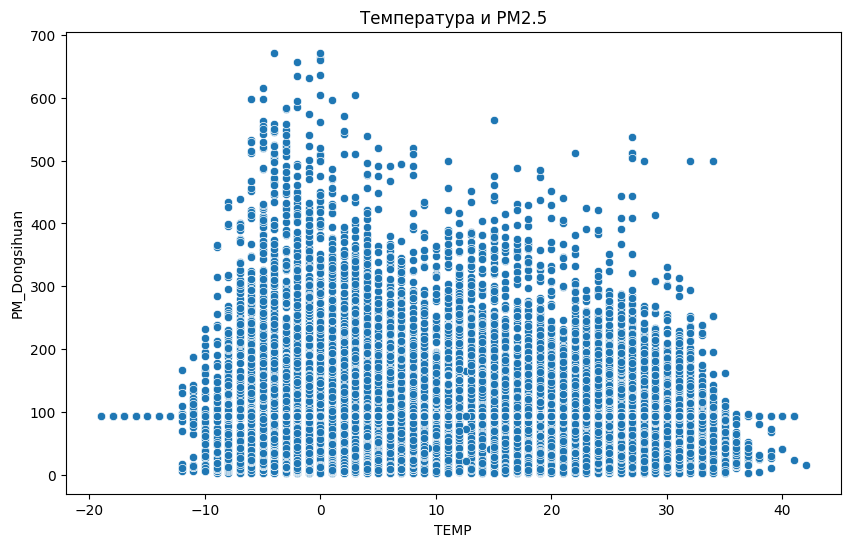

In [24]:
# Пример для двух переменных
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='PM_Dongsihuan', data=df)
plt.title('Температура и PM2.5')
plt.show()


In [25]:
import numpy as np
df['log_PM_Dongsihuan'] = np.log1p(df['PM_Dongsihuan'])


In [26]:
df['log_PM_Dongsihuan'].head()

0    4.538612
1    4.538612
2    4.538612
3    4.538612
4    4.538612
Name: log_PM_Dongsihuan, dtype: float64

In [27]:
from scipy.stats import ttest_ind

group_high_temp = df[df['TEMP'] > 0]['PM_Dongsihuan']
group_low_temp = df[df['TEMP'] <= 0]['PM_Dongsihuan']

# Проведение t-теста
t_stat, p_value = ttest_ind(group_high_temp, group_low_temp)

print(f'T-statistic: {t_stat}, p-value: {p_value}')

# Проверка значимости p-value
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Существует статистически значимая разница между группами.")
else:
    print("Принимаем нулевую гипотезу: Нет статистически значимой разницы между группами.")


T-statistic: -20.817896889237083, p-value: 7.272319781378527e-96
Отвергаем нулевую гипотезу: Существует статистически значимая разница между группами.


In [28]:
# Создание нового признака
df['new_feature'] = df['PM_Dongsihuan'] * df['Iws']

print(df[['PM_Dongsihuan', 'Iws', 'new_feature']].head())


   PM_Dongsihuan    Iws  new_feature
0      92.560806   1.79   165.683842
1      92.560806   4.92   455.399163
2      92.560806   6.71   621.083005
3      92.560806   9.84   910.798327
4      92.560806  12.97  1200.513648
